---
<font size="5" color='#03D3E8'>
    Example applying Reduction PCA - Random Forest with Exoplanet Dataset
</font>

---


<font size="4" color='#03D3E8'>
    <b>Step 1         
</font>

It will be assumed that each flux lecture are independent through time and it will be considered like independent variables. First step, it'll be read train and test dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,cohen_kappa_score,roc_curve, auc,accuracy_score,confusion_matrix,f1_score,precision_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

#Use your directory work, the data do not need a special treatment to read

Train=pd.read_csv('D:\\mis documentos\\Data Science Certificate\\Module 4 - Machine Learning\\Group Assignment\\exoTrain.csv',sep=',')
Test=pd.read_csv('D:\\mis documentos\\Data Science Certificate\\Module 4 - Machine Learning\\Group Assignment\\exoTest.csv',sep=',')

print(Train.shape)
print(Test.shape)

(5087, 3198)
(570, 3198)


In [2]:
Train.head(2)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93


In [3]:
Test.head(2)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72


In [4]:
Train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


<font size="4" color='#03D3E8'>
    <b>Step 2         
</font>

It can be seen extreme values with minimum and maximum. Second step, normalize using MinMax scaler and passes them using pipeline

In [6]:
variables=list(Train.columns)
variables.remove('LABEL')

scale_step=('scale',MinMaxScaler())
num_pipe=Pipeline([scale_step])
num_trans=[('num',num_pipe, variables)]

col_trans=ColumnTransformer(transformers=num_trans)
col_trans.fit(Train[variables])
X_Train=col_trans.transform(Train[variables])
col_trans.fit(Test[variables])
X_Test=col_trans.transform(Test[variables])

In [8]:
X_Train

array([[0.13673478, 0.17838747, 0.16207309, ..., 0.77224094, 0.77152869,
        0.75266417],
       [0.13665516, 0.17832096, 0.16202821, ..., 0.77218296, 0.77154071,
        0.75273377],
       [0.13699799, 0.17864307, 0.16235477, ..., 0.77214565, 0.77144603,
        0.75259731],
       ...,
       [0.13684248, 0.17849725, 0.16221097, ..., 0.77226942, 0.77161012,
        0.7528034 ],
       [0.13668078, 0.17834126, 0.16205974, ..., 0.7721608 , 0.77151604,
        0.75270746],
       [0.1368724 , 0.17851329, 0.1622289 , ..., 0.77215851, 0.77150759,
        0.752743  ]])

In [9]:
X_Test

array([[0.16996941, 0.04835513, 0.16324088, ..., 0.29780392, 0.2972462 ,
        0.2927919 ],
       [0.18600325, 0.06669597, 0.17946142, ..., 0.28957691, 0.28852436,
        0.28579297],
       [0.1720379 , 0.05070443, 0.16521018, ..., 0.29712418, 0.29620466,
        0.29270129],
       ...,
       [0.16947301, 0.04788238, 0.16287304, ..., 0.29770011, 0.29637898,
        0.29266139],
       [0.169888  , 0.04830728, 0.16313242, ..., 0.2976525 , 0.29630776,
        0.29265771],
       [0.17839442, 0.05714049, 0.17050675, ..., 0.29673186, 0.29609297,
        0.29300544]])

In [11]:
Y_Train=np.array(Train['LABEL'])
Y_Test=np.array(Test['LABEL'])

print(len(Y_Train))
print(len(Y_Test))

5087
570


<font size="4" color='#03D3E8'>
    <b>Step 3         
</font>

It'll be used PCA to reduce dimension. Let's see how many components accumulates at least the 95% explained variance ratio

In [13]:
np.random.seed(123)

pca=PCA()

pca.fit(X_Train)

cum_sum=np.cumsum(pca.explained_variance_ratio_)

dim= np.argmax(cum_sum>=0.95)+1

print('Number of components that explained 95% variance ratio',dim)

Number of components that explained 95% variance ratio 11


In [15]:
# --- Adjusting PCA to 11 components

pca_adj=PCA(n_components=11)
X_Train_PCA=pca_adj.fit_transform(X_Train)
X_Test_PCA=pca_adj.fit_transform(X_Test)
cum_sum_X_Train=np.cumsum(pca_adj.explained_variance_ratio_)

print(len(X_Train_PCA))
print(len(X_Test_PCA))

5087
570


<font size="4" color='#03D3E8'>
    <b>Step 4         
</font>

Apply random forest after PCA reduction

In [16]:
param_randf={'n_estimators':[4, 5, 10, 20, 50]}

# param_randf={'n_estimators':[50,100,150,200,250,300]}

start_PCA= dt.datetime.now()

randf_PCA=RandomForestClassifier()

randf_PCA_grid=GridSearchCV(estimator=randf_PCA, param_grid=param_randf,scoring='accuracy',n_jobs=6,cv=5)
randf_PCA_grid.fit(X_Train_PCA,Y_Train)
end_PCA= dt.datetime.now()

total_time_PCA=end_PCA-start_PCA

print('total_time_PCA',total_time_PCA)  # 0:01:38.127170

print('best_estimator',randf_PCA_grid.best_estimator_)
print('best_score',randf_PCA_grid.best_score_)
print('best_params',randf_PCA_grid.best_params_)

Y_pred_PCA=randf_PCA_grid.predict(X_Test_PCA)


total_time_PCA 0:00:01.769235
best_estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best_score 0.9927265578926676
best_params {'n_estimators': 4}


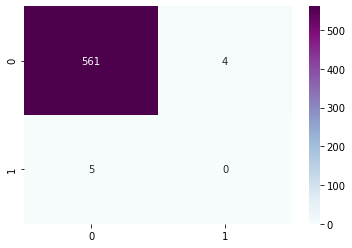

In [25]:
ax=sns.heatmap(confusion_matrix(Y_Test,Y_pred_PCA),annot=True,cmap="BuPu",fmt='d')
plt.show()

In [22]:
accuracy_score(Y_Test,Y_pred_PCA)  #Accuracy = 0.984 

0.9842105263157894